# 🟢  Exercise 1


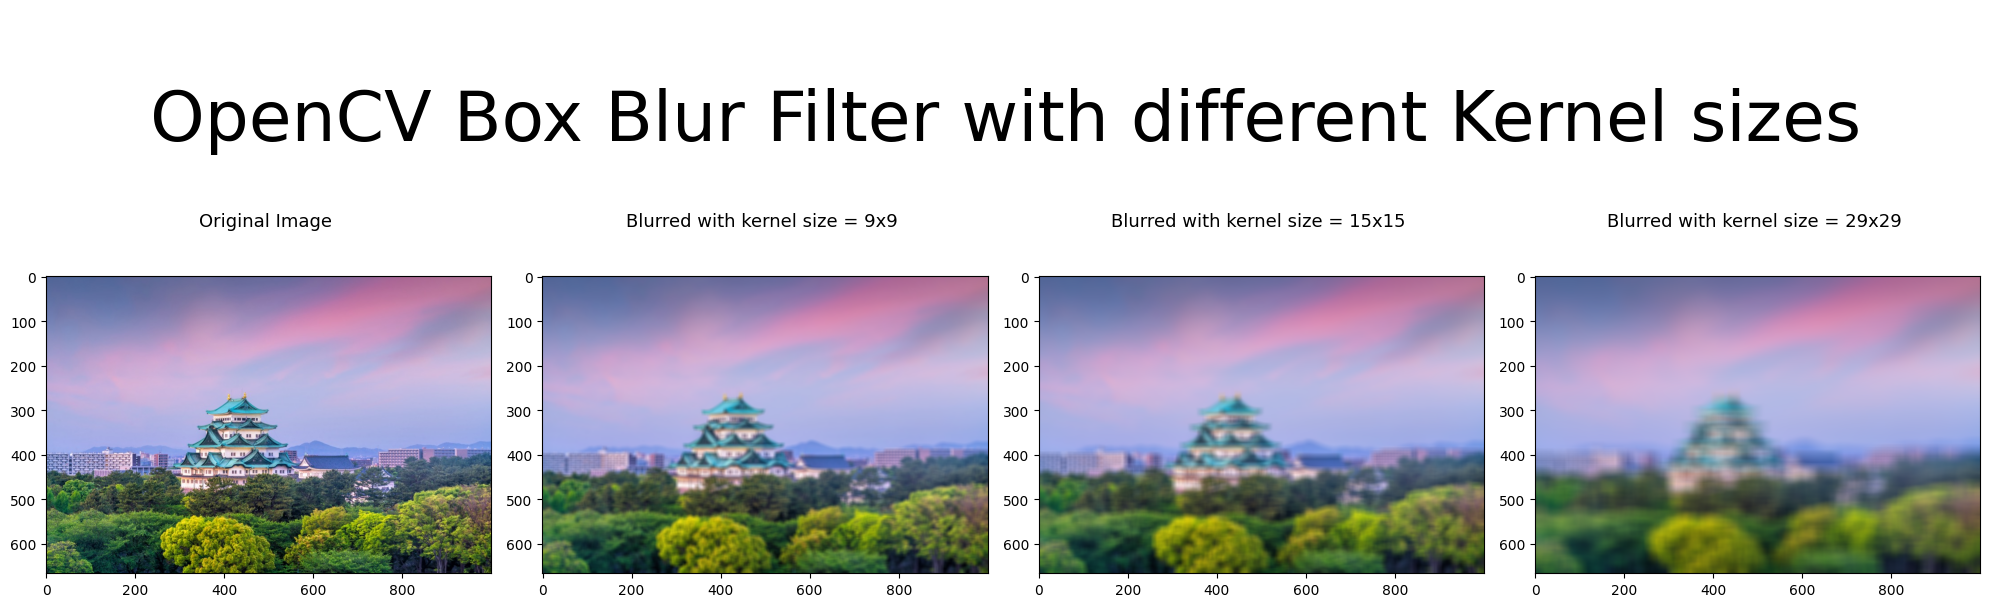

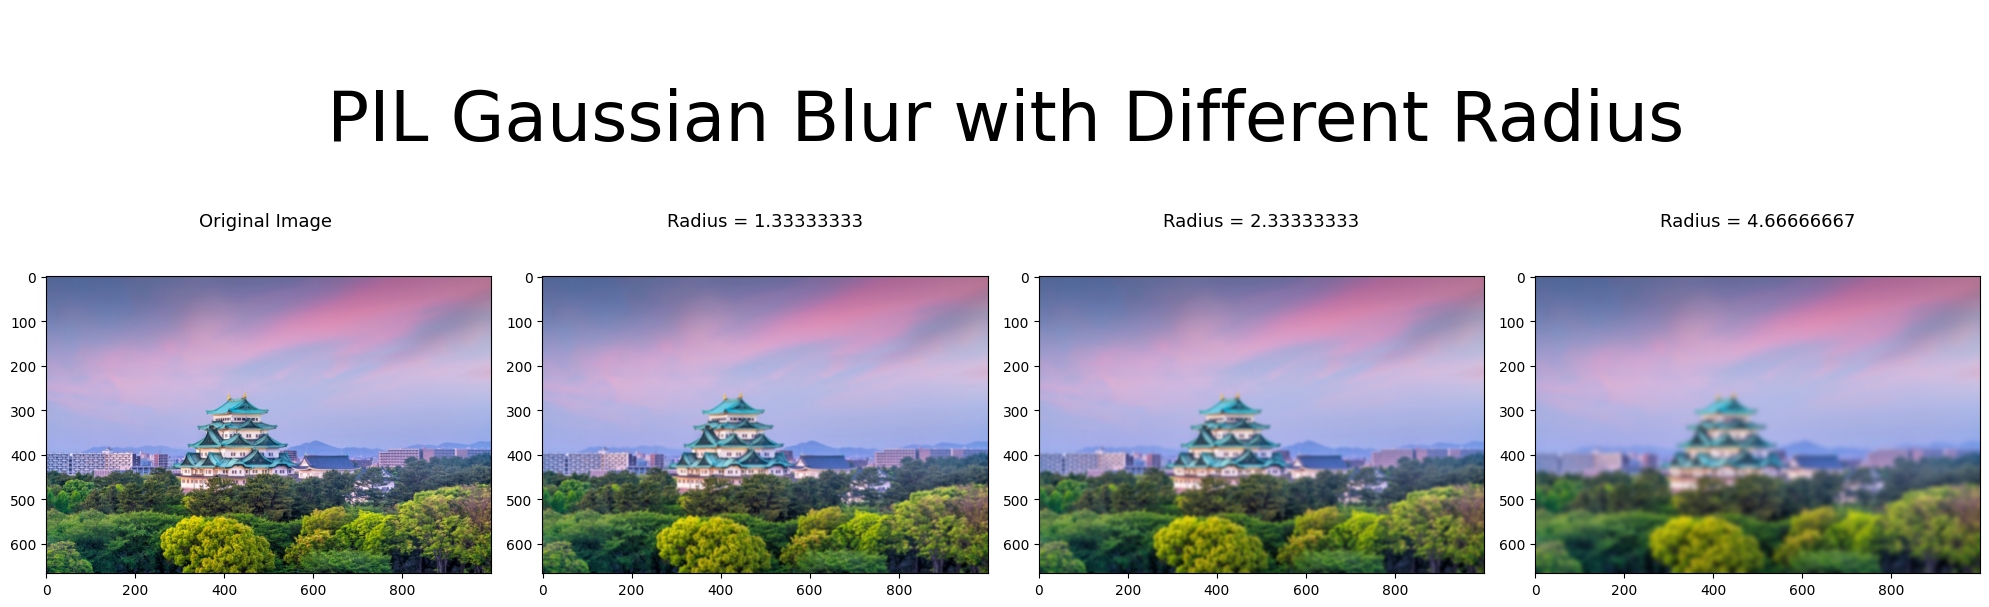

In [ ]:
import numpy as np, cv2
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter

def plot_image(image, title):
    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(title, size=13)

image = cv2.imread('/content/lab6.jpg')

plt.figure(figsize=(20, 7))
plt.subplot(1, 4, 1)
plot_image(image, 'Original Image \n\n')

for i, n in enumerate([9, 15, 29], start=2):
    image_blurred = cv2.blur(image, (n, n))
    plt.subplot(1, 4, i)
    plot_image(image_blurred, f'Blurred with kernel size = {n}x{n} \n\n')
plt.suptitle('\n OpenCV Box Blur Filter with different Kernel sizes', size=50)
plt.tight_layout()
plt.show()

#   ---------------------------------------

def plot_image(image, title):
    plt.imshow(image)
    plt.title(title, size=13)

image = Image.open('/content/lab6.jpg')

plt.figure(figsize=(20, 7))
plt.subplot(1, 4, 1)
plot_image(image, 'Original Image \n\n')
# σ = n - 1 / 6
#   = 9 - 1 / 6   -> 1.33333333
#   = 15 - 1 / 6  -> 2.33333333
#   = 29 - 1 / 6  -> 4.66666667
for i, radius in enumerate([1.33333333, 2.33333333, 4.66666667], start=1):
    im_blurred = image.filter(ImageFilter.GaussianBlur(radius))
    plt.subplot(1, 4, i+1)
    plot_image(im_blurred, 'Radius = ' + str(radius) + '\n\n')

plt.suptitle('\n PIL Gaussian Blur with Different Radius', size=50)
plt.tight_layout()
plt.show()


# 🟢  Exercise 2


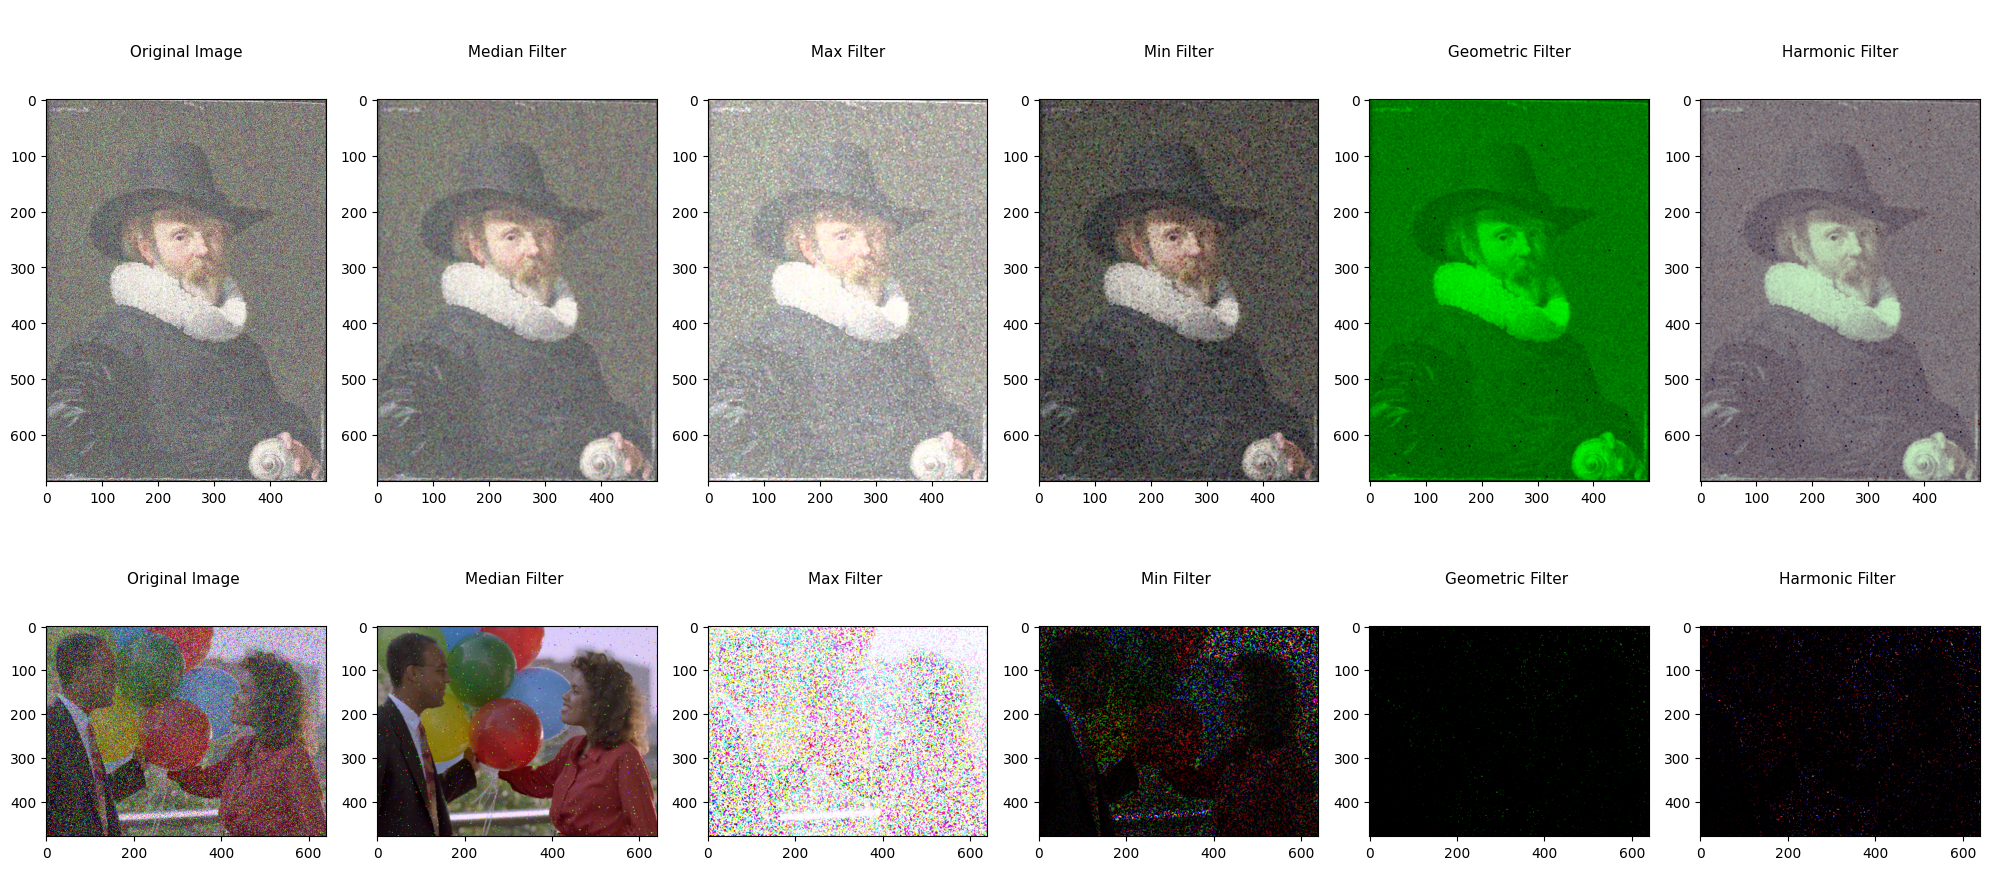

In [ ]:
# Read images
image1 = cv2.imread('/content/Lab6img1.webp')
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('/content/Lab6img2.png')
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


# Convert images to PIL format
image1_pil = Image.fromarray(image1_rgb)
image2_pil = Image.fromarray(image2_rgb)


# Kernel size 3
sz = 3


# Apply the median
im1 = image1_pil.filter(ImageFilter.MedianFilter(size=sz))
im2 = image2_pil.filter(ImageFilter.MedianFilter(size=sz))


# Apply the max filter
im_max1 = image1_pil.filter(ImageFilter.MaxFilter(size=sz))
im_max2 = image2_pil.filter(ImageFilter.MaxFilter(size=sz))


# Apply the min filter
im_min1 = image1_pil.filter(ImageFilter.MinFilter(size=sz))
im_min2 = image2_pil.filter(ImageFilter.MinFilter(size=sz))


# Geometric mean function,
# Product of elements in the array / elements ->  (x1*x2*.....*x27)^1/27
def geometric(arr):
    # print("Number of elements in the array:", arr.size)
    return np.prod(arr) ** (1 / arr.size)
# Apply the geometric mean
geometric_image1 = generic_filter(image1_pil, geometric, size=(3, 3, 3), mode='constant', cval=0 )
geometric_image2 = generic_filter(image2_pil, geometric, size=(3, 3, 3), mode='constant', cval=0 )


# Harmonic mean function,
# Elements / sum of the reciprocals of all elements ->      27/(1/x1 + 1/x2 + ...+1/x27)
def harmonic(arr):
    n = 27
    return n / np.sum(1.0 / (arr + 1e-10), axis=0)          # 1e-10  -> small value 0.0000000001 to avoid error /0
# Apply the harmonic mean
harmonic_image1 = generic_filter(image1_pil, harmonic, size=(3, 3, 3), mode='constant', cval=140 )
harmonic_image2 = generic_filter(image2_pil, harmonic, size=(3, 3, 3), mode='constant', cval=140 )


# Plotting
plt.figure(figsize=(20, 10))


# Row Image 1
plt.subplot(2, 6, 1)
plt.imshow(image1_rgb)
plt.title('\n\n Original Image \n\n', fontsize=11)

plt.subplot(2, 6, 2)
plt.imshow(im1)
plt.title('\n\n Median Filter \n\n', fontsize=11)

plt.subplot(2, 6, 3)
plt.imshow(im_max1)
plt.title('\n\n Max Filter \n\n', fontsize=11)

plt.subplot(2, 6, 4)
plt.imshow(im_min1)
plt.title('\n\n Min Filter \n\n', fontsize=11)

plt.subplot(2, 6, 5)
plt.imshow(geometric_image1.astype(np.uint8))
plt.title('\n\n Geometric Filter \n\n', fontsize=11)

plt.subplot(2, 6, 6)
plt.imshow(harmonic_image1.astype(np.uint8))
plt.title('\n\n Harmonic Filter \n\n', fontsize=11)

# Row Image 2
plt.subplot(2, 6, 7)
plt.imshow(image2_rgb)
plt.title('Original Image \n\n', fontsize=11)

plt.subplot(2, 6, 8)
plt.imshow(im2)
plt.title('Median Filter \n\n', fontsize=11)

plt.subplot(2, 6, 9)
plt.imshow(im_max2)
plt.title('Max Filter \n\n', fontsize=11)

plt.subplot(2, 6, 10)
plt.imshow(im_min2)
plt.title('Min Filter \n\n', fontsize=11)

plt.subplot(2, 6, 11)
plt.imshow(geometric_image2.astype(np.uint8))
plt.title('Geometric Filter \n\n', fontsize=11)

plt.subplot(2, 6, 12)
plt.imshow(harmonic_image2.astype(np.uint8))
plt.title('Harmonic Filter \n\n', fontsize=11)

plt.tight_layout()
plt.show()

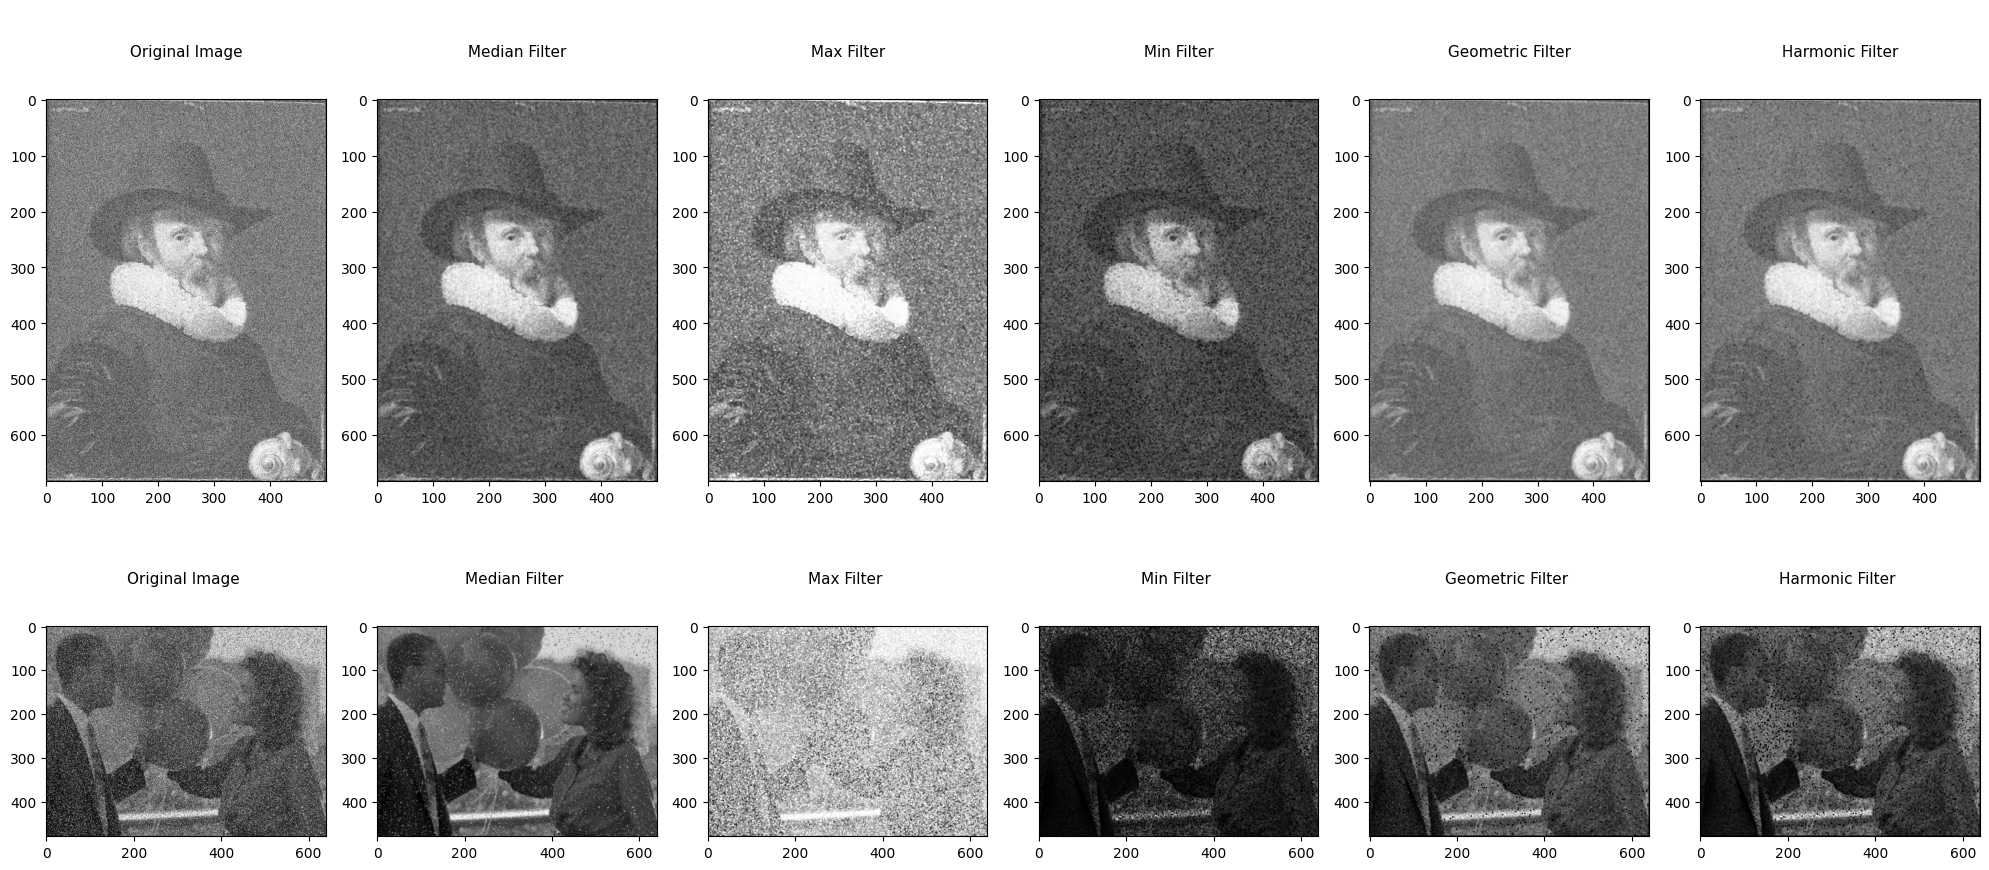

In [ ]:
# Read images
image1 = cv2.imread('/content/Lab6img1.webp')
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.imread('/content/Lab6img2.png')
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


# Convert images to PIL format
image1_pil = Image.fromarray(image1_gray)
image2_pil = Image.fromarray(image2_gray)


# Kernel size 3
sz = 3

# Apply the median
im1 = image1_pil.filter(ImageFilter.MedianFilter(size=sz))
im2 = image2_pil.filter(ImageFilter.MedianFilter(size=sz))


# Apply the max filter
im_max1 = image1_pil.filter(ImageFilter.MaxFilter(size=sz))
im_max2 = image2_pil.filter(ImageFilter.MaxFilter(size=sz))


# Apply the min filter
im_min1 = image1_pil.filter(ImageFilter.MinFilter(size=sz))
im_min2 = image2_pil.filter(ImageFilter.MinFilter(size=sz))


# Geometric mean function
# Product of elements in the array / elements ->     (x1*x2*.....)^1/9
def geometric(arr):
    return np.prod(arr) ** (1 / arr.size)
# Apply the geometric mean with padding
geometric_image1 = generic_filter(image1_pil, geometric, size=(3, 3), mode='constant', cval=0)
geometric_image2 = generic_filter(image2_pil, geometric, size=(3, 3), mode='constant', cval=0)


# Harmonic mean function
# Elements / sum of the reciprocals of all elements ->    9/(1/x1 + 1/x2 + ....)
def harmonic(arr):
    n = 9
    return n / np.sum(1.0 / (arr + 1e-10), axis=None)  # 1e-10  -> small value 0.0000000001 to avoid error /0
# Apply the harmonic mean with padding
harmonic_image1 = generic_filter(image1_pil, harmonic, size=(3, 3), mode='constant', cval=0)
harmonic_image2 = generic_filter(image2_pil, harmonic, size=(3, 3), mode='constant', cval=0)


# Plotting
plt.figure(figsize=(20, 10))


# Row Image 1
plt.subplot(2, 6, 1)
plt.imshow(image1_gray, cmap='gray')
plt.title('\n\n Original Image \n\n', fontsize=11)

plt.subplot(2, 6, 2)
plt.imshow(im1, cmap='gray')
plt.title('\n\n Median Filter \n\n', fontsize=11)

plt.subplot(2, 6, 3)
plt.imshow(im_max1, cmap='gray')
plt.title('\n\n Max Filter \n\n', fontsize=11)

plt.subplot(2, 6, 4)
plt.imshow(im_min1, cmap='gray')
plt.title('\n\n Min Filter \n\n', fontsize=11)

plt.subplot(2, 6, 5)
plt.imshow(geometric_image1.astype(np.uint8), cmap='gray')
plt.title('\n\n Geometric Filter \n\n', fontsize=11)

plt.subplot(2, 6, 6)
plt.imshow(harmonic_image1.astype(np.uint8), cmap='gray')
plt.title('\n\n Harmonic Filter \n\n', fontsize=11)

# Row Image 2
plt.subplot(2, 6, 7)
plt.imshow(image2_gray, cmap='gray')
plt.title('Original Image \n\n', fontsize=11)

plt.subplot(2, 6, 8)
plt.imshow(im2, cmap='gray')
plt.title('Median Filter \n\n', fontsize=11)

plt.subplot(2, 6, 9)
plt.imshow(im_max2, cmap='gray')
plt.title('Max Filter \n\n', fontsize=11)

plt.subplot(2, 6, 10)
plt.imshow(im_min2, cmap='gray')
plt.title('Min Filter \n\n', fontsize=11)

plt.subplot(2, 6, 11)
plt.imshow(geometric_image2.astype(np.uint8), cmap='gray')
plt.title('Geometric Filter \n\n', fontsize=11)

plt.subplot(2, 6, 12)
plt.imshow(harmonic_image2.astype(np.uint8), cmap='gray')
plt.title('Harmonic Filter \n\n', fontsize=11)

plt.tight_layout()
plt.show()